In [1]:
# Import libraries
import os
import numpy as np

from plantcv import plantcv as pcv 
#from PIL import Image
#import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Set the notebook display method
# inline = embedded plots, notebook = interactive plots
%matplotlib inline

In [13]:
tomato_image_path = "/mnt/stor/ceph/csb/marsfarm/projects/inputs/MV1-0039_7.11.23-8.11.23(Tomato)/2023-07-14_0105.jpg"
pea_image_path = "/mnt/stor/ceph/csb/marsfarm/projects/inputs/MV1-0041_6.2.23-6.20.23(Peas)/2023-06-01_2105.jpg"
purple_basil_image_path = "/mnt/stor/ceph/csb/marsfarm/projects/inputs/MV1-0043_6.1.23-6.16.23(Purple Basil)/2023-05-31_2105.jpg"

In [14]:
# Read the first image in the datased to be used as reference for the ROIs
tomato_image, _, _ = pcv.readimage(filename=tomato_image_path)
pea_image, _, _ = pcv.readimage(filename=pea_image_path)
purple_basil_image, _, _ = pcv.readimage(filename=purple_basil_image_path)

In [19]:
import cv2
def extract_plant_pixels(img):
    # Load the image
    #img = cv2.imread(image_path)
    
    # Convert the image from RGB to HSV
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    # Define the range of green color in HSV
    lower_green = np.array([25, 40, 40])
    upper_green = np.array([100, 255, 255])
    
    # Threshold the HSV image to get only green colors
    mask = cv2.inRange(hsv, lower_green, upper_green)
    
    # Bitwise-AND mask and original image to extract green parts
    plant_pixels = cv2.bitwise_and(img, img, mask=mask)

    return plant_pixels
    
    # Display the original and the result
    cv2.imshow('Original Image', img)
    cv2.imshow('Plant Pixels', plant_pixels)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


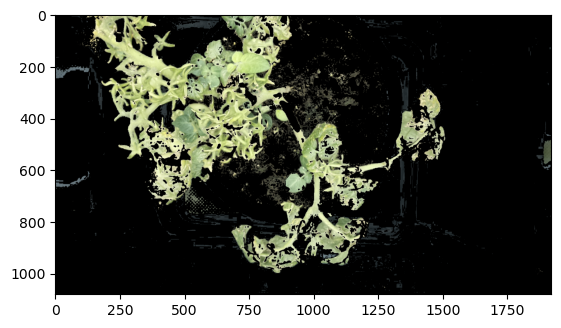

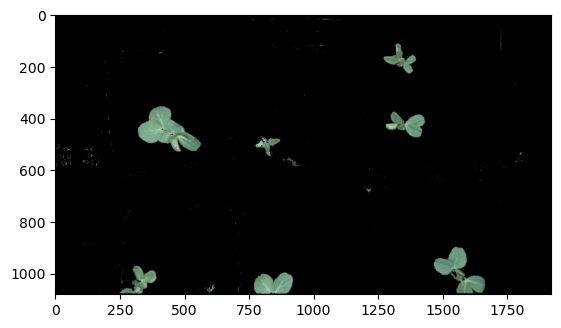

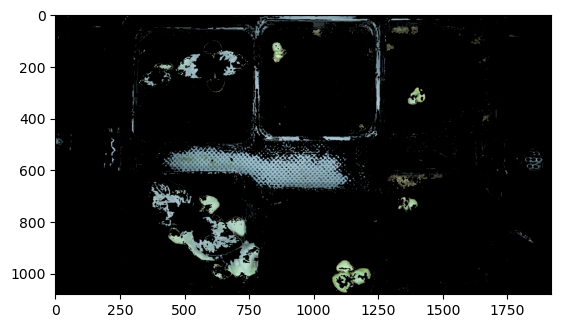

In [20]:
tomato_leaf_detected = extract_plant_pixels(tomato_image)
pea_leaf_detected = extract_plant_pixels(pea_image)
purple_basil_leaf_detected = extract_plant_pixels(purple_basil_image)



pcv.plot_image(tomato_leaf_detected)
pcv.plot_image(pea_leaf_detected)
pcv.plot_image(purple_basil_leaf_detected)

In [27]:
#this one seems better
def extract_plant_pixels(img):
    # Load the image
    #img = cv2.imread(image_path)
    
    # Convert the image from RGB to HSV
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    # Define the range of green color in HSV
    # Adjusted range of green color in HSV to reduce false positives
    lower_green = np.array([25, 40, 40])
    upper_green = np.array([95, 255, 255])
    
    # Threshold the HSV image to get only green colors
    mask = cv2.inRange(hsv, lower_green, upper_green)
    
    # Bitwise-AND mask and original image to extract green parts
    plant_pixels = cv2.bitwise_and(img, img, mask=mask)

    return plant_pixels

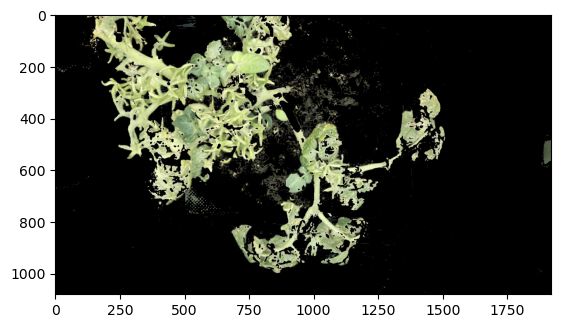

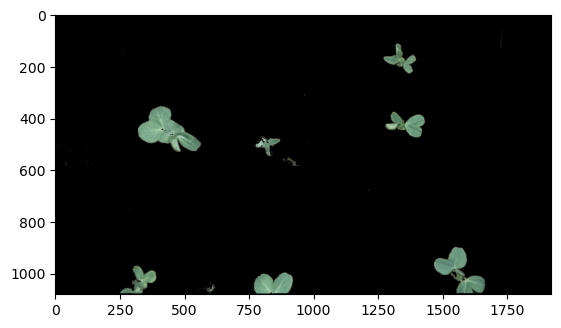

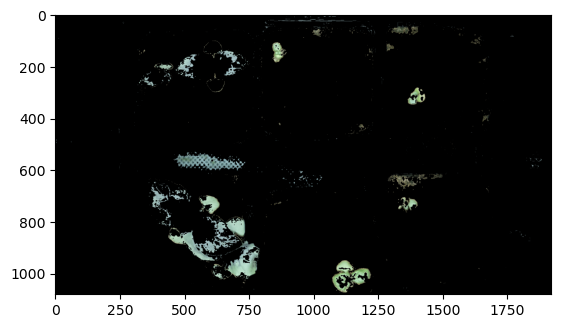

In [26]:
tomato_leaf_detected = extract_plant_pixels(tomato_image)
pea_leaf_detected = extract_plant_pixels(pea_image)
purple_basil_leaf_detected = extract_plant_pixels(purple_basil_image)



pcv.plot_image(tomato_leaf_detected)
pcv.plot_image(pea_leaf_detected)
pcv.plot_image(purple_basil_leaf_detected)

In [28]:
def count_non_black_pixels(image):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Count all non-zero (non-black) pixels
    count_non_black = cv2.countNonZero(gray_image)
    return count_non_black

In [30]:
#based on the results of these, I would guess that 50k would be a decent lower bounds.
print(count_non_black_pixels(tomato_leaf_detected))
print(count_non_black_pixels(pea_leaf_detected))
print(count_non_black_pixels(purple_basil_leaf_detected))

454679
74002
74251
